In [ ]:
%pip install -U langgraph
%pip install langchain_openai
%pip install langchain-community
%pip install langchain-core
%pip install graphviz
%pip install pygraphviz
%pip install tavily-python

### Web Search Tool - TavilyClient

In [3]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults
from utils.helper import get_tavily_api_key

os.environ["TAVILY_API_KEY"] = get_tavily_api_key()
tavily_tool = TavilySearchResults(max_results=4)


In [11]:
# Test tool
result = tavily_tool.invoke("Give me facts about Washington state")
result

[{'url': 'https://www.50states.com/facts/washington.htm',
  'content': 'The state of Washington is the only state to be named after a United States president. Seattle is home to the first revolving restaurant, 1961. WA is the Two-letter or Postal Abbreviation and Wash. is the Traditional or Standard Abbreviation for the State of Washington. Microsoft Corporation is located in Redmond.'},
 {'url': 'https://www.factretriever.com/washington-facts',
  'content': '10 Wonderful Washington Facts. Washington produces more apples than any other state in America. [7] Washington state is the only state named after a U.S. president. It also has the only state flag with a picture of a president. [7] Washington state produces more red raspberries, pears, apples, and sweet cherries than any other state in America.'},
 {'url': 'https://thefactfile.org/washington-facts/',
  'content': '4. "Seattle" was named after the Indian leader "Sealth.". 5. Arctic, a town in Washington State was supposed to be nam

In [4]:
from core.langechainagent.agent import Agent
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_openai import ChatOpenAI
from utils import helper

prompt = """Your are a smart research assistant. Use the search engine to look up information. \
    You are allowed to make multiple calls (either together or in sequence). \
    Only look up information when you are sure of what you want. \
    If you need look up some information before asking a follow up questions, you are allowed to do that!
    """

key, model = helper.get_open_ai_model_and_key()
tool = TavilySearchResults(max_results=4) #increased number of results
model = ChatOpenAI(model=model, openai_api_key = key)

bot = Agent(model=model,tools=[tool],system=prompt)


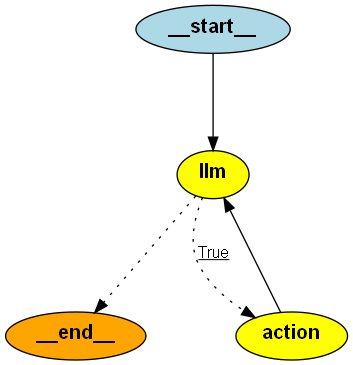

In [5]:
from IPython.display import Image
Image(bot.graph.get_graph().draw_png())

### Question : I want to visit Origan next month, I have 2 toddler, suggest me 5 places to visit and good place to stay

This question has two parts

In [6]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="I want to visit Origan next month, I have 2 toddler, suggest me 5 places to visit and good place to stay ?")]
result = bot.graph.invoke({"messages": messages})

calling tool {'name': 'tavily_search_results_json', 'args': {'query': 'Top 5 places to visit in Oregon for families with toddlers'}, 'id': 'call_vnGt4fAjAijMCPFznbX6MRVN'}
calling tool {'name': 'tavily_search_results_json', 'args': {'query': 'Best family-friendly accommodations in Oregon'}, 'id': 'call_aTOeFBePXwP00oT3YivRdbp4'}
Back to the model!


In [7]:
print(result['messages'][-1].content)

Here are some suggestions for places to visit in Oregon with your toddlers:

1. Cruise on Willamette River - Portland
2. Columbia Gorge Waterfalls Tour - Columbia River Gorge
3. Rogue Valley Rapid Run - Grants Pass
4. Mount Hood Day Tour - Mount Hood
5. Newport Oregon - a fantastic city on the Oregon Coast with family-friendly attractions and scenic coastal locations

For accommodations, here are some family-friendly options in Oregon:
1. The Mark Spencer Hotel in Portland
2. Salishan Coastal Lodge in Gleneden Beach
3. The Ocean Lodge in Cannon Beach
4. Sunriver Resort in Sunriver

These places offer a range of activities and amenities suitable for families with toddlers.
